In [2]:
import tweepy
import numpy as np
import pandas as pd
import requests
import json

## GATHER

The twitter-archive-enhanced.csv file has already been given to us, we just need to open the file and load it into a dataframe for analysis and cleaning purposes. 

The second file, image-predictions, however has to be downloaded from the gievn URL using the requests library in python.

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Quite a bit of missing data. There are few non-null values in columns which store info about retweets. Also, expanded_urls column also doesn't have all http addresses for all rows.  

Now we need to download the predictions of each tweet and is present is "image_predictions.tsv", which should be downloaded using requests library.

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
r = requests.get(url)

In [7]:
with open('predictions.tsv', mode='wb') as f:
    f.write(r.content)

In [110]:
pred = pd.read_csv('predictions.tsv', sep='\t')
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


So our second dataframe has been gathered. We have 1 dataframe, which is our twitter archive, and another dataframe  which contains image predictions for each tweet, which we have downloaded and saved in a tsv file and then saved in a dataframe.

In [3]:
df.tweet_id.dtype

dtype('float64')

In [4]:
print(df.tweet_id[0])
print(int(df.tweet_id[0]))
print(str(df.tweet_id[0]))

8.92421e+17
892421000000000000
8.92421e+17


The tweet_id is stored in float format. Directly converting this to string or numeric will lead to loss in precision, and will give wrong tweet_id. So we'll extract the tweet_id from the URL column, and use that to get the tweet information.

In [5]:
regex = '(https://twitter.com/dog_rates/status/([0-9]+)/(photo|video)/1)'#regex to extract tweetID

In [7]:
df['tweet_id'] = df['expanded_urls'].str.extract(regex, expand=True)[1]#second capture group is tweet ID

In [8]:
df.tweet_id.sample(15)

821     770293558247038976
434     820314633777061888
122     869227993411051520
2338    666104133288665088
467     817120970343411712
1902    674644256330530816
881                    NaN
2192    668932921458302977
1176    719991154352222208
961     751132876104687617
587     799757965289017345
613     796865951799083009
877     760893934457552897
2025    671882082306625538
1207    715733265223708672
Name: tweet_id, dtype: object

In [26]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

type(api.get_status(int(df.tweet_id[0]), tweet_mode='extended'))

tweepy.models.Status

In [27]:
t = 0

with open('tweet_json.txt', mode='w') as f:
    for tweetid in df['tweet_id'].unique():
        try:
            print("Trying "+str(t)+"....")
            content = api.get_status(int(tweetid))
            f.write(json.dumps(content._json)+'\n')
            t = t + 1
        except:
            print("Error at "+str(t) + " tweetID is "+str(tweetid))
            t = t+1

Trying 0....
Trying 1....
Trying 2....
Trying 3....
Trying 4....
Trying 5....
Trying 6....
Trying 7....
Trying 8....
Trying 9....
Trying 10....
Trying 11....
Trying 12....
Trying 13....
Trying 14....
Trying 15....
Trying 16....
Trying 17....
Trying 18....
Trying 19....
Trying 20....
Trying 21....
Trying 22....
Trying 23....
Trying 24....
Trying 25....
Trying 26....
Trying 27....
Trying 28....
Trying 29....
Error at 29 tweetID is nan
Trying 30....
Trying 31....
Trying 32....
Trying 33....
Trying 34....
Trying 35....
Trying 36....
Trying 37....
Trying 38....
Trying 39....
Trying 40....
Trying 41....
Trying 42....
Trying 43....
Trying 44....
Trying 45....
Trying 46....
Trying 47....
Trying 48....
Trying 49....
Trying 50....
Trying 51....
Trying 52....
Trying 53....
Trying 54....
Trying 55....
Trying 56....
Trying 57....
Trying 58....
Trying 59....
Trying 60....
Trying 61....
Trying 62....
Trying 63....
Trying 64....
Trying 65....
Trying 66....
Trying 67....
Trying 68....
Trying 69....
Try

In [28]:
nd = ['754011816964026368', '728986383096946689', '669683899023405056']
#error at these tweets, so trying again.

In [29]:
with open('tweet_json.txt', mode='a') as f:
    for tweetid in nd:
        try:
            print("Trying "+str(t)+"....")
            content = api.get_status(tweetid)
            f.write(json.dumps(content._json)+'\n')
            t = t + 1
        except:
            print("Error at "+str(t) + " tweetID is "+str(tweetid))
            t = t+1

Trying 1995....
Error at 1995 tweetID is 754011816964026368
Trying 1996....
Trying 1997....


Tweet corresponding to tweet_id 754011816964026368 has been deleted, hence we should drop it from our dataframe.

Now that we've downloaded the tweet information into a file tweet_json.txt, we can read that data and extract tweetID, retweet count and favourite count for all of the tweets and store in a dataframe.

In [3]:
tweet_dict = []
with open('tweet_json.txt', mode='r') as f:
    for tweet_data in f:
        json_obj = json.loads(tweet_data)
        tweetID = str(json_obj['id'])
        retweet_count = json_obj['retweet_count']
        fav_count = json_obj['favorite_count']
        
        tweet_dict.append({'tweet_id' : tweetID,
                           'retweet_count' : retweet_count,
                           'fav_count' : fav_count})

df2 = pd.DataFrame(tweet_dict)

print(type(df2))

df2.head()

<class 'pandas.core.frame.DataFrame'>


,fav_count,retweet_count,tweet_id
0,38668,8551,892420643555336193
1,33129,6286,892177421306343426
2,24941,4166,891815181378084864
3,42049,8672,891689557279858688
4,40200,9440,891327558926688256


In [4]:
df2.shape

(1993, 3)

## ANALYSIS

Now we shall dig deep into the 2 dataframes df and pred and find cleanliness and tidiness issues to resolve. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [7]:
df.dtypes

tweet_id                      float64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [3]:
df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
Toby          7
Buddy         7
Daisy         7
an            7
Koda          6
Rusty         6
Jack          6
Dave          6
Milo          6
Jax           6
Oscar         6
Stanley       6
Bella         6
Scout         6
Leo           6
Chester       5
           ... 
Staniel       1
Stark         1
Berb          1
Jo            1
Swagger       1
Kaia          1
Cheryl        1
Godi          1
Eevee         1
Tebow         1
Cilantro      1
Toffee        1
Benny         1
BeBe          1
Aubie         1
Barry         1
Rudy          1
Callie        1
Stefan        1
Grizz         1
Mac           1
Chase         1
Storkson      1
Tayzie        1
Willy         1
Jeremy        1
Loomis        1
General       1
Dunkin        1
Major         1
Name: name, Length: 957,

Observation : Many dog names are 'a', 'the' and 'an' in the dataset, which cannot be a dog name.

In [6]:
# this code prints random 10 URL's from expanded_urls column.
listurls = df.expanded_urls.sample(10)
for http in listurls:
    print(http)

https://twitter.com/dog_rates/status/679844490799091713/photo/1
https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1
https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1
https://twitter.com/dog_rates/status/666362758909284353/photo/1
https://twitter.com/dog_rates/status/832636094638288896/photo/1
https://vine.co/v/hQJbaj1VpIz,https://vine.co/v/hQJbaj1VpIz
https://twitter.com/dog_rates/status/675781562965868544/photo/1
https://twitter.com/dog_rates/status/687704180304273409/photo/1
https://twitter.com/dog_rates/status/684188786104872960/photo/1
https://twitter.com/dog_rates/status/706166467411222528/photo/1


Quite a few cells have multiple http addresses, and this issue must be resolved. Also, addresses not belonging to weRateDogs page must be removed.

In [31]:
#number of empty rows in expanded_urls
df[df.expanded_urls.isna()].shape

(59, 17)

In [8]:
urls_count = df.expanded_urls.apply(lambda x : len(str(x).split(',')))
## this list stores how many urls are stored in each cell under expanded_urls, as multiple url's are seperated by ','. 

In [9]:
urls_count.value_counts()

1    1717
2     365
4     134
3     120
5      10
6       6
8       4
Name: expanded_urls, dtype: int64

As we can see, there are large no. of cells under expanded_urls column which stores more than 1 URL.

In [10]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
341,8.322160e+17,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.930000e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
447,8.190150e+17,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190000e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None
1853,6.757070e+17,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1872,6.751470e+17,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
1895,6.747430e+17,6.750000e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Some clarification is required. The dog is sin...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1941,6.737160e+17,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a heavily opinionated dog. Loves walls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861...,4,10,a,None,None,None,None
2260,6.675510e+17,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.680000e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


In [55]:
df.shape

(2356, 17)

In [56]:
w = df.doggo=='doggo'
x = df.pupper == 'pupper'
y = df.puppo == 'puppo'
z = df.floofer == 'floofer'
df[ w | x | y | z].shape

(380, 17)

Out of 2356 rows in our dataset, only 380 rows have the dog stage specified. 

In [23]:
df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [14]:
li = df.text.sample(10)##taking random 10 samples from text for assessment
for l in li:
    print(l)

This is Tobi. She is properly fetching her shot. H*ckin nifty af bandana. 13/10 would send fully armed battalion to remind her of my love https://t.co/3FIqvumEXE
This is Loomis. He's the leader of the Kenneth search party. The passion is almost overwhelming. 12/10 one day he will be free https://t.co/kCRKlFg4AY
Meet Malikai. He was rolling around having fun when he remembered the inevitable heat death of the universe. 10/10 https://t.co/Vd2FqHIIGn
This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
This pup is sad bc he didn't get to be the toy car. Also he has shitty money management skills. 10/10 still cute tho https://t.co/PiSXXZjDSJ
Meet Daisy. She's been pup for adoption for months now but hasn't gotten any applications. 11/10 let's change that

https://t.co/Jlb9L0m3J0 https://t.co/Eh7fGFuy6r
This is Chipson. He weighed in at .3 ounces and is officially super h*ckin smol. Space-saving af. 11/10 woul

In [24]:
df[df.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,7.499810e+17,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


While most numerator values are in the 8-13 range, some numerators have absurdly large values, like 1776 also. However, upon visiting the link, I realised that it is not a typo or input error, and it is actually a rating.

In [26]:
df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

Even though denominator is mostly 10, some tweets even have denominator as low as 0 or as high as 170.

Now doing assessment of pred dataframe.

In [13]:
pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1505,785264754247995392,https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg,1,teddy,0.674893,False,cradle,0.056740,False,chow,0.056137,True
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,Chihuahua,0.104152,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False
1140,729823566028484608,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1,kelpie,0.218408,True,Arabian_camel,0.114368,False,coyote,0.096409,False
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False


In [14]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There isn't any missing data in this dataset. Let us continue our assessment.

In [15]:
pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [17]:
#size1 variable stores how many observations have been classified as dogs as their top prediction.
size1 = pred[pred.p1_dog==True].shape[0]
pred[pred.p1_dog==True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


In [18]:
'''
size2 stores how many observations have been classified as dogs in their second and third highest classification, but
not as its top classification.
'''
size2 = pred[(pred.p1_dog==False) & (pred.p2_dog==True) & (pred.p3_dog==True)].shape[0]
pred[(pred.p1_dog==False) & (pred.p2_dog==True) & (pred.p2_dog==True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False


In [19]:
'''
size3 stores how many observations have been classified as not dogs in their first, second and third highest
classifications.
'''
size3 = pred[(pred.p1_dog==False) & (pred.p2_dog==False) & (pred.p3_dog==False)].shape[0]
pred[(pred.p1_dog==False) & (pred.p2_dog==False) & (pred.p2_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False


In [20]:
print(size1)# top predicition being dog
print(size2)# top prediction not dog, but 2nd and 3rd prediction being dog 
print(size3)# all predictions not dog

1532
101
324


There are 1532 rows in pred for which the top prediction is a dog, while there are 101 more rows for which top prediction is not a dog, but the 2nd and 3rd high prediction is a dog. Upon visiting the URL's of these pics, it seems that each time the second and third prediction of dog classification true, it <b>is</b> a dog.



In [137]:
df2.sample(10)

,fav_count,retweet_count,tweet_id
723,11217,3996,756526248105566208
1759,566,219,670452855871037440
1344,3071,1143,683142553609318400
1821,1227,423,669216679721873412
1179,1718,655,695064344191721472
266,17987,3984,832757312314028032
1314,3737,1601,684914660081053696
1646,1151,409,672609152938721280
1103,2641,832,702276748847800320
1917,458,247,667437278097252352


In [5]:
df2.dtypes

fav_count         int64
retweet_count     int64
tweet_id         object
dtype: object

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 3 columns):
fav_count        1993 non-null int64
retweet_count    1993 non-null int64
tweet_id         1993 non-null object
dtypes: int64(2), object(1)
memory usage: 46.8+ KB


### QUALITY

#### ASSESSING 1

1) Some cells in expanded_url have 2 or more urls, sometimes they are same and sometimes they represent different websites. Need to keep only single correct twitter url.

2) Some rows don't have URL address stored.

3) Many tweet id's are repeated, occur twice in the dataset.

4) Timestamp data is stored in object data type.

5) Retweeted timestamp is stored as object type.

6) Many dog names are 'a', which is not possible. 

7) 324 rows in pred dataframe not corresponding to that of a dog.

8) Tweet_id in pred dataframe is stored in int type.

9) Tweet_id 754011816964026368 has been deleted from twitter archive.


#### CLEANING 1


1) Need to extract correct twitter http using regex.

2) Drop empty rows from dataframe, as it is not possible to use these rows for further analysis(tweet_id cannot be gathered)

3) Need to remove duplicate tweet ID's from dataset.

4) Convert timestamp data to datetime format.

5) Convert retweeted timestamp to datetime format.

6) Convert 'a' named dogs to 'None', since those dogs names are not known actually.

7) Keep only those rows in pred in which either highest prediction is dog, or both second and third highest prediction is a dog.

8) Convert tweet_id into str format.

9) Drop 754011816964026368 from our dataframe.

### TIDINESS

#### ASSESSING

1) The dog type(pupper/puppo/floofer/dogggo) is stored as different columns.

2) img_num in pred dataframe doesn't convey any required information.

3) Dog breed prediction which is stored in pred dataframe should be consolidated with df.

4) Retweet count and fav_count of each tweet is stored in different dataframe.

#### CLEANING

1) Condense into single column. 

2) Drop img_num column.

3) Merge df and pred dataframes and keep only dog_breed and jpg_url from the latter, as rest are not required.

4) Consolidate it into the same dataframe.


DEFINE:

The accurate URL's for weRateDogs are:

['https://twitter.com/dog_rates/status/711694788429553666/photo/1'] should be accepted

['https://twitter.com/dog_rates/status/752334515931054080/video/1'] should be accepted

Doesn't belong to WeRateDogs:

['https://twitter.com/micahgrimes/status/817902080979599361'] should not be accepted

['https://vine.co/v/iAP0Ugzi2PO'] should not be accepted


In [55]:
df_clean = df.copy()  ##create a copy of the dataset

DEFINE : First we will define the correct regex for extracting correct twitter address. Then we will use pandas extract function to extract the URL's from expanded_urls column. Those cells which do not have an appropriate address will be replaced by NaN.

In [97]:
regex = '(https://twitter.com/dog_rates/status/([0-9]+)/(photo|video)/1)'#regex to extract URL and tweetID

In [56]:
df_clean['expanded_urls'] = df_clean['expanded_urls'].str.extract(regex, expand=True)[0]#first capture group is URL

In [58]:
#test

df_clean.expanded_urls.sample(10)

1718    https://twitter.com/dog_rates/status/680176173...
1876    https://twitter.com/dog_rates/status/675111688...
1071    https://twitter.com/dog_rates/status/740214038...
1286                                                  NaN
1543    https://twitter.com/dog_rates/status/689557536...
1137    https://twitter.com/dog_rates/status/728046963...
2250    https://twitter.com/dog_rates/status/667832474...
1800    https://twitter.com/dog_rates/status/676975532...
255     https://twitter.com/dog_rates/status/844223788...
2046    https://twitter.com/dog_rates/status/671520732...
Name: expanded_urls, dtype: object

In [59]:
urls_count = df_clean.expanded_urls.apply(lambda x : len(str(x).split(',')))
urls_count.value_counts()

1    2356
Name: expanded_urls, dtype: int64

So now we can see that all rows have only 1 URL address, not multiple addresses anymore.

In [60]:
# DEFINE : now we have to drop the rows which didn't have a twitter address...those cells have been replaced by NaNs

print( df_clean[df_clean.expanded_urls.isna()].shape ) #print how many nan's are there in expanded_urls

ind = df_clean[df_clean.expanded_urls.isna()].index #store index of rows to be dropped
df_clean.drop(ind, inplace=True)

# TEST if any NaN's are present
print( df_clean[df_clean.expanded_urls.isna()].shape ) 

(218, 17)
(0, 17)


In [61]:
df_clean.shape

(2138, 17)

In [62]:
df_clean2 = df_clean.copy()

DEFINE : Need to drop duplicate tweet_id's from our dataframe.

In [63]:
df_clean.tweet_id.value_counts()

765222098633691136    2
775733305207554048    2
873213775632977920    2
776113305656188928    2
750719632563142656    2
753375668877008896    2
820749716845686786    2
863062471531167744    2
781524693396357120    2
782722598790725632    2
681523177663676416    2
739979191639244800    2
840632337062862849    2
887473957103951883    2
819004803107983360    2
703041949650034688    2
773308824254029826    2
833124694597443584    2
771380798096281600    2
771770456517009408    2
725842289046749185    2
866450705531457537    2
740676976021798912    2
667152164079423490    2
831650051525054464    2
783334639985389568    2
779834332596887552    2
675501075957489664    2
780931614150983680    2
826958653328592898    2
                     ..
699079609774645248    1
749417653287129088    1
673656262056419329    1
811985624773361665    1
693095443459342336    1
735137028879360001    1
669683899023405056    1
675820929667219457    1
844973813909606400    1
828408677031882754    1
7149576200173076

Now we are interested in removing all duplicate tweet_id's from the dataset. So for this we will drop all duplicates taking into account only the tweet_id column as subset.

In [64]:
df_clean[df_clean.duplicated(subset=['tweet_id'])].shape
# tweetID's which have been duplicated in the dataset

(144, 17)

In [65]:
# CODE
df_clean.drop_duplicates(subset = ['tweet_id'], keep='first', inplace=True) # drop all tweet_id's which have 
#been duplicated

In [66]:
# TEST : print all duplicates
df_clean[df_clean.tweet_id.duplicated()] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [67]:
df_clean.shape# shape of dataframe after droppping all duplicates

(1994, 17)

In [70]:
df_clean2 = df_clean.copy()

DEFINE : Data type of timestamp is type str, need to convert into datetime object.

In [71]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
df_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp)

In [72]:
# test
df_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

DEFINE : Now we shall address the issue of dog names. Dog name's like a, such, an, the need to be replaced by None, as they are incorrect data.

In [73]:
df_clean[df_clean.name=='None'].shape

(546, 17)

In [74]:
df_clean[(df_clean.name=='a') | (df_clean.name=='such') | (df_clean.name=='the') | (df_clean.name=='an')].shape

(69, 17)

In [75]:
df_clean.name.value_counts()

None            546
a                55
Charlie          11
Oliver           10
Lucy             10
Cooper           10
Penny             9
Tucker            9
Winston           8
Sadie             8
the               7
Lola              7
Toby              7
Daisy             7
Bo                6
Koda              6
Jax               6
an                6
Bella             6
Stanley           6
Oscar             5
Scout             5
Milo              5
Leo               5
Bailey            5
Chester           5
Rusty             5
Louis             5
Buddy             5
Dave              5
               ... 
Leela             1
Chesterson        1
Noosh             1
Goose             1
Tyrus             1
Humphrey          1
Bungalo           1
Bruiser           1
Mojo              1
Zeus              1
Crouton           1
Ed                1
Dwight            1
Opie              1
Chef              1
Bertson           1
Lilli             1
Marq              1
Carly             1


In [76]:
#Now we'll convert all 'a' names to 'None'.

df_clean['name'] = df_clean['name'].apply(lambda x: 'None' if x=='a' else x)

#then all 'an' to 'None'
df_clean['name'] = df_clean['name'].apply(lambda x: 'None' if x=='an' else x)

#then all 'such' to 'None'
df_clean['name'] = df_clean['name'].apply(lambda x: 'None' if x=='such' else x)

#then all 'the' to 'None'
df_clean['name'] = df_clean['name'].apply(lambda x: 'None' if x=='the' else x)

In [77]:
#test
df_clean.name.value_counts()

None            615
Charlie          11
Cooper           10
Lucy             10
Oliver           10
Tucker            9
Penny             9
Winston           8
Sadie             8
Toby              7
Lola              7
Daisy             7
Bella             6
Stanley           6
Jax               6
Koda              6
Bo                6
Scout             5
Oscar             5
Louis             5
Bailey            5
Leo               5
Dave              5
Chester           5
Rusty             5
Milo              5
Buddy             5
Sophie            4
Scooter           4
Phil              4
               ... 
Noosh             1
Goose             1
Cupid             1
Logan             1
Tom               1
Cheesy            1
Tyrus             1
Humphrey          1
Zeus              1
Crouton           1
Ed                1
Dwight            1
Opie              1
Chef              1
Bertson           1
Lilli             1
Marq              1
Carly             1
Brady             1


In [78]:
df_clean2 = df_clean.copy()

In [79]:
#it is better to reset index and drop previoues indices, for cleanliness purpose.

df_clean = df_clean.reset_index()
df_clean.drop('index',axis=1,inplace=True)
df_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1989,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
1990,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
1991,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
1992,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None
1993,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


DEFINE: Now we shall deal with the next cleanliness issue. We'll create a new column which will store the appropriate dog stage for each row. The we'll append that column to the dataframe.

In [80]:
# CODE

dog_stage = []

for x in df_clean.doggo:
    dog_stage.append(x)

for i in range(0,len(df_clean.floofer)):
    if df_clean.iloc[i, 14] == 'floofer':
        dog_stage[i] = 'floofer'
    if df_clean.iloc[i,15]=='pupper':
        dog_stage[i] = 'pupper'
    if df_clean.iloc[i,16]=='puppo':
        dog_stage[i] = 'puppo'
        
dog_stage = pd.Series(dog_stage)

In [103]:
# TEST
df_clean = pd.concat([df_clean, dog_stage], axis=1)
df_clean.iloc[:,13:].sample(10)

,doggo,floofer,pupper,puppo,0
305,None,None,None,None,None
312,doggo,None,None,None,doggo
1105,None,None,None,None,None
735,None,None,None,None,None
279,None,None,pupper,None,pupper
1674,None,None,None,None,None
763,None,None,None,None,None
700,None,None,None,None,None
1155,None,None,pupper,None,pupper
749,None,None,None,None,None


In [82]:
df_clean.shape

(1994, 18)

Now that we've succesfully condensed ine information of doggo, pupper, puppo and floofer columns into a new column, now we can drop these columns as they are redundant. 

In [105]:
df_clean.drop(['pupper','puppo','floofer','doggo'], axis=1, inplace=True)

Let's rename the 0 column as dog_stage, as that is more descriptive of it's data. 

In [106]:
df_clean =  df_clean.rename(mapper = {0:'dog_stage'}, axis=1)

In [107]:
#test the columns
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [108]:
df_clean2 = df_clean.copy()

DEFINE : The tweet information corresponding to tweet_id 754011816964026368 has been deleted, hence we need to remove it from our dataset.

In [118]:
#CODE

ind = df_clean[df_clean.tweet_id == '754011816964026368'].index

df_clean.drop(ind, inplace=True, axis=0)

In [119]:
#TEST

df_clean[df_clean.tweet_id == '754011816964026368']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [120]:
df_clean2 = df_clean.copy()

Now we will deal with the pred dataframe.

In [111]:
pred_clean = pred.copy()

DEFINE : We shall get the indices of dogs of which highest prediction is not dog, and either of second and third highest prediction is not dog. Then we shall drop these indices.

In [112]:
ind = pred[ (pred.p1_dog==False) & ((pred.p2_dog==False) | (pred.p3_dog==False)) ].index
pred_clean = pred_clean.drop(ind, axis=0)

In [113]:
#test if any row has top 2 predictions as false, and third prediction as true.

pred_clean[(pred_clean.p1_dog==False) & (pred_clean.p2_dog==False) & (pred_clean.p3_dog==True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [114]:
#test if any row has top and third prediction as false, but second as true.

pred_clean[(pred_clean.p1_dog==False) & (pred_clean.p2_dog==True) & (pred_clean.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


DEFINE : We need to create a new column which will store the predicted dog breed in it. This will take values from both p1 and p2. If the top prediction of dog is true, then it will take value p1, otherwise it will take the value p2.

In [115]:
pred_clean.shape

(1633, 12)

In [121]:
pred_clean.reset_index(inplace=True)

In [122]:
breed = []

for ind in pred_clean.index:
    
    if pred_clean.iloc[ind, 6]==True:          # if top prediction is dog
        breed.append(pred_clean.iloc[ind,4])   # take predicted value from p1
    else:
        breed.append(pred_clean.iloc[ind,7])   # else take predicted value from p2, which is second highest prediction

In [123]:
breed

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'chow',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'Italian_greyhound',
 'Maltese_dog',
 'Newfoundland',
 'golden_retriever',
 'malamute',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'German_shepherd',
 'Labrador_retriever',
 'miniature_poodle',
 'miniature_pinscher',
 'Italian_greyhound',
 'English_setter',
 'miniature_schnauzer',
 'Maltese_dog',
 'Airedale',
 'golden_retriever',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Chihuahua',
 'Pembroke',
 'West_Highland_white_terrier',
 'toy_poodle',
 'golden_retriever',
 'miniature_pinscher',
 'giant_schnauzer',
 'toy_poodle',
 

DEFINE : Now that we've populated the breed list with appropriate dog breeds, we need to integrate these into the pred dataframe. We can do so by first converting it into Series data and then concatenate it into pred, along axis 1.

In [124]:
breed = pd.Series(breed)
pred_clean = pd.concat( [pred_clean, breed], axis=1)

In [125]:
pred_clean.head()

,index,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,0
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


Now we can drop other irrelevant rows.

In [126]:
names = ['index','img_num', 'p1','p1_conf', 'p1_dog', 'p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
pred_clean.drop(names, axis=1, inplace=True)

In [127]:
pred_clean.head()

,tweet_id,jpg_url,0
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


In [132]:
#convert data type of tweet_id in pred from int to str

pred_clean.tweet_id = pred_clean.tweet_id.astype('str')
pred_clean.dtypes

tweet_id    object
jpg_url     object
0           object
dtype: object

### ASSESS 2

1) Column name of '0' is meaningless.

2) ' _ ' present in dog breed name.

### CLEAN 2

1) Change column name to dog_breed.

2) Remove underscore and replace by space.

In [133]:
pred_clean = pred_clean.rename(mapper={0:'dog_breed'}, axis=1)

In [134]:
pred_clean.dtypes

tweet_id     object
jpg_url      object
dog_breed    object
dtype: object

In [135]:
pred_clean.dog_breed = pred_clean.dog_breed.apply( lambda x : str(x).replace('_',' '))

In [136]:
pred_clean.head()

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher


Now that we have the appropriate columns in pred_clean, we can merge the df_clean and pred_clean datasets and consolidate the dog_breed information and jpg_url together into the df_clean dataset.

In [301]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [300]:
df_clean2 = df_clean.copy()

In [302]:
# DEFINE : now merge df and pred dataframes on twitter_ID of the former

df_clean = df_clean.merge(pred_clean, on='tweet_id', how='left')
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


In [304]:
df_clean3 = df_clean.copy()

DEFINE : Now we shall merge the 2 dataframes df_clean and df2 using the twitter ID's of the former.

In [307]:
df_clean = df_clean.merge( df2, on='tweet_id', how='left')
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,fav_count,retweet_count
1551,674774481756377088,NaN,NaN,2015-12-10 02:15:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Superpup. His head isn't proportional ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674774481...,11,10,Superpup,pupper,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,Chihuahua,1180,510
1467,677269281705472000,NaN,NaN,2015-12-16 23:29:14,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/677269281...,10,10,None,pupper,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,Shetland sheepdog,2093,764
1375,681302363064414209,NaN,NaN,2015-12-28 02:35:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,None,NaN,NaN,4216,2004
1154,697616773278015490,NaN,NaN,2016-02-11 03:02:54,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doubles as a hallway rug. Very rar...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/697616773...,11,10,None,pupper,https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg,Lhasa,3362,1100
294,828409743546925057,NaN,NaN,2017-02-06 01:07:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Mutt Ryan. He's quite confident at the...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/828409743...,12,10,Mutt,None,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,toy poodle,6746,1272
128,862457590147678208,NaN,NaN,2017-05-11 00:01:27,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,NaN,NaN,20953,5141
1553,674764817387900928,NaN,NaN,2015-12-10 01:37:23,"<a href=""http://twitter.com/download/iphone"" r...",These two pups are masters of camouflage. Very...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674764817...,10,10,None,None,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,Samoyed,820,255
479,701214700881756160,NaN,NaN,2016-11-16 01:09:57,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.010000e+17,4.196984e+09,2016-02-21 01:19:47,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,Chihuahua,13061,5592
816,745314880350101504,NaN,NaN,2016-06-21 17:58:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She excels underwater. 12/10 ph...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/745314880...,12,10,Sugar,None,NaN,NaN,7668,3044
389,813910438903693312,NaN,NaN,2016-12-28 00:52:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/813910438...,11,10,Chubbs,doggo,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,Siberian husky,10083,2107


In [308]:
df_clean.shape

(1993, 18)

In [309]:
df_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
dog_stage                             object
jpg_url                               object
dog_breed                             object
fav_count                              int64
retweet_count                          int64
dtype: object

### ASSESS 3

Some additional quality issues not addresses before:

1) Retweet information should not be stored in our dataset.

2) After 1, retweeted_status_id and other columns storing information about retweets are redundant.


### CLEAN 3

1) Find all non-null rows in the retweet information columns, and drop them and then remove the columns.

2) Drop all columns storing information about retweets.


In [310]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'dog_breed',
       'fav_count', 'retweet_count'],
      dtype='object')

In [311]:
df_clean4 = df_clean.copy()

In [336]:
# DEFINE : get the indices of rows to be dropped, and then drop those indices.
# first get the indices of rows having non-null values at retweeted_status_id, as those are retweets.

ind = df_clean[df_clean.retweeted_status_id.notnull()].index

In [337]:
# drop the rows corresponding to those indices.

df_clean.drop(ind, inplace=True, axis=0)

In [339]:
#test : printing the rows having some non null value in retweeted_status_id

df_clean[df_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,fav_count,retweet_count


It is an empty dataframe, which means that all rows corresponding to retweets have been dropped. So now we can drop the columns too.

In [340]:
# columns we need to drop : retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [341]:
#test

df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'dog_breed',
       'fav_count', 'retweet_count'],
      dtype='object')

In [343]:
df_clean[df_clean.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,fav_count,retweet_count


The current version of df_clean has got data from the original df, the pred dataframe(dog_breed and jpg_url) and from the latest dataframe df2(retweet_count and fav_count). So this is our final master dataframe and we should store this seperately in a different csv file.

In [344]:
df_clean.to_csv('master_dataframe.csv', index=False)

## INSIGHTS AND VISUALS

In [345]:
df = pd.read_csv('master_dataframe.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,fav_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,NaN,38674,8555
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,33136,6288
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,24948,4171
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,NaN,NaN,42054,8676
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,40214,9444


In [346]:
#for each dog_breed, I want the avg. fav_count

df2 = df.groupby('dog_breed')['fav_count'].mean().astype('int')
print(type(df2))

df2 = df2[df2>8000]

print(len(df2))

<class 'pandas.core.series.Series'>
41


In [320]:
import matplotlib.pyplot as plt
% matplotlib inline

Text(0.5,1,'Dog breed vs Favourite count')

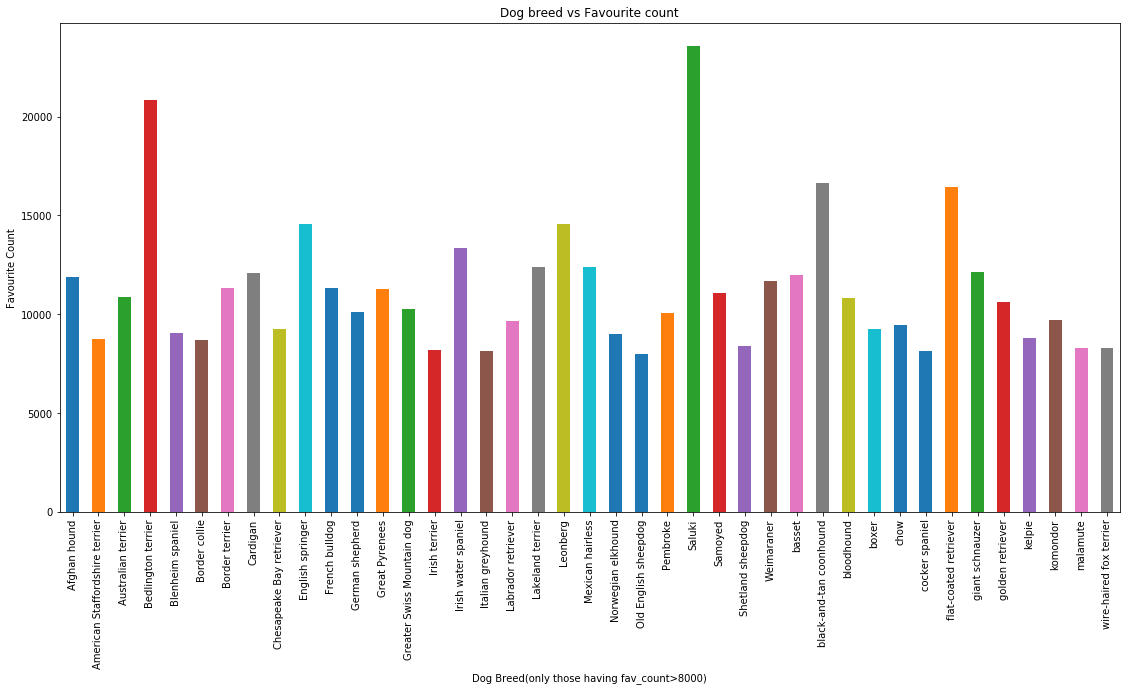

In [347]:
df2.plot(kind='bar', figsize=(19,9))
plt.xlabel('Dog Breed(only those having fav_count>8000)')
plt.ylabel('Favourite Count')
plt.title('Dog breed vs Favourite count')

In [348]:
#average favourite count of all dogs

int(df.fav_count.mean())

7592

In [349]:
df.dog_breed.value_counts()

golden retriever               125
Labrador retriever              92
Pembroke                        89
Chihuahua                       79
pug                             53
toy poodle                      40
chow                            39
Pomeranian                      36
Samoyed                         35
malamute                        29
Chesapeake Bay retriever        25
cocker spaniel                  24
miniature pinscher              24
French bulldog                  21
German shepherd                 21
Siberian husky                  20
Rottweiler                      18
Shetland sheepdog               18
Shih-Tzu                        18
Maltese dog                     18
Staffordshire bullterrier       17
Italian greyhound               17
Lakeland terrier                16
beagle                          16
kuvasz                          16
Cardigan                        15
Eskimo dog                      15
basset                          15
soft-coated wheaten 

In [350]:
names = list(df.dog_breed.value_counts().index)
for x in range(30,len(names)):
    names[x] = ' '

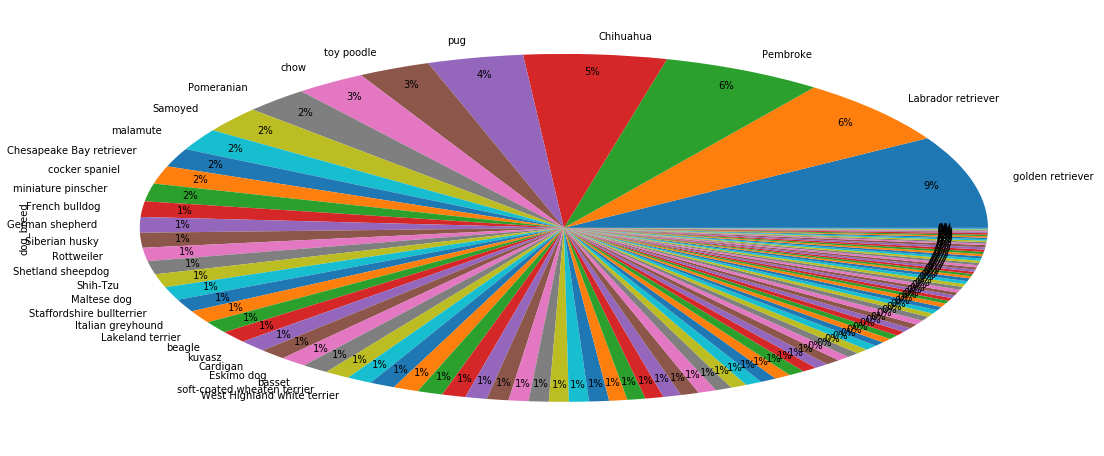

In [351]:
df.dog_breed.value_counts().plot(kind='pie', figsize=(19,8), labels=names, autopct='%1.0f%%',pctdistance=0.9)

Text(0,0.5,'Favourite Count')

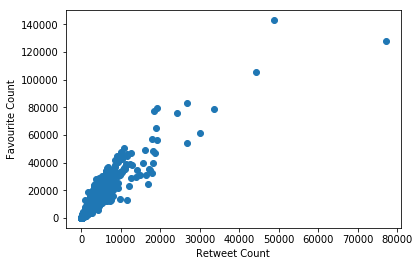

In [352]:
plt.scatter(df.retweet_count, df.fav_count)
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count')

In [353]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1813
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       26
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64